# YOLOv8 Box versus Whell Dataset Training
- by Marcelo Rovai @Sept24

## Verify GPU
 In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Tue Sep 10 13:47:51 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

In [3]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.91 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.6/112.6 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

## Dataset

In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="8NEOn2tX76EJbk9hQTb4")
project = rf.workspace("marcelo-rovai-riila").project("box-versus-wheel-auto-dataset")
version = project.version(5)
dataset = version.download("yolov8")


/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.3 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.91, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Box-versus-Wheel-auto-dataset-5 in yolov8:: 100%|██████████| 318/318 [00:00<00:00, 8613.15it/s]


## Training

Modify data.yaml with the correct path:

test: /content/datasets/test/images

train: /content/datasets/Bee-Detection-1/train/images

val: /content/datasets/Bee-Detection-1/valid/images


In [6]:
MODEL = 'yolov8n.pt'
IMG_SIZE = 640
EPOCHS = 25
HALF=True

In [7]:
%cd {HOME}

!yolo task=detect mode=train model={MODEL} data={dataset.location}/data.yaml epochs={EPOCHS} imgsz={IMG_SIZE} plots=True half={HALF}

/content
100% 6.25M/6.25M [00:00<00:00, 118MB/s]
Ultralytics YOLOv8.2.91 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/datasets/Box-versus-Wheel-auto-dataset-5/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=True, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt

In [8]:
!ls {HOME}/runs/detect/train/

args.yaml					    P_curve.png		train_batch136.jpg
confusion_matrix_normalized.png			    PR_curve.png	train_batch137.jpg
confusion_matrix.png				    R_curve.png		train_batch1.jpg
events.out.tfevents.1725976589.0a9c23eeb6fe.2673.0  results.csv		train_batch2.jpg
F1_curve.png					    results.png		val_batch0_labels.jpg
labels_correlogram.jpg				    train_batch0.jpg	val_batch0_pred.jpg
labels.jpg					    train_batch135.jpg	weights


/content


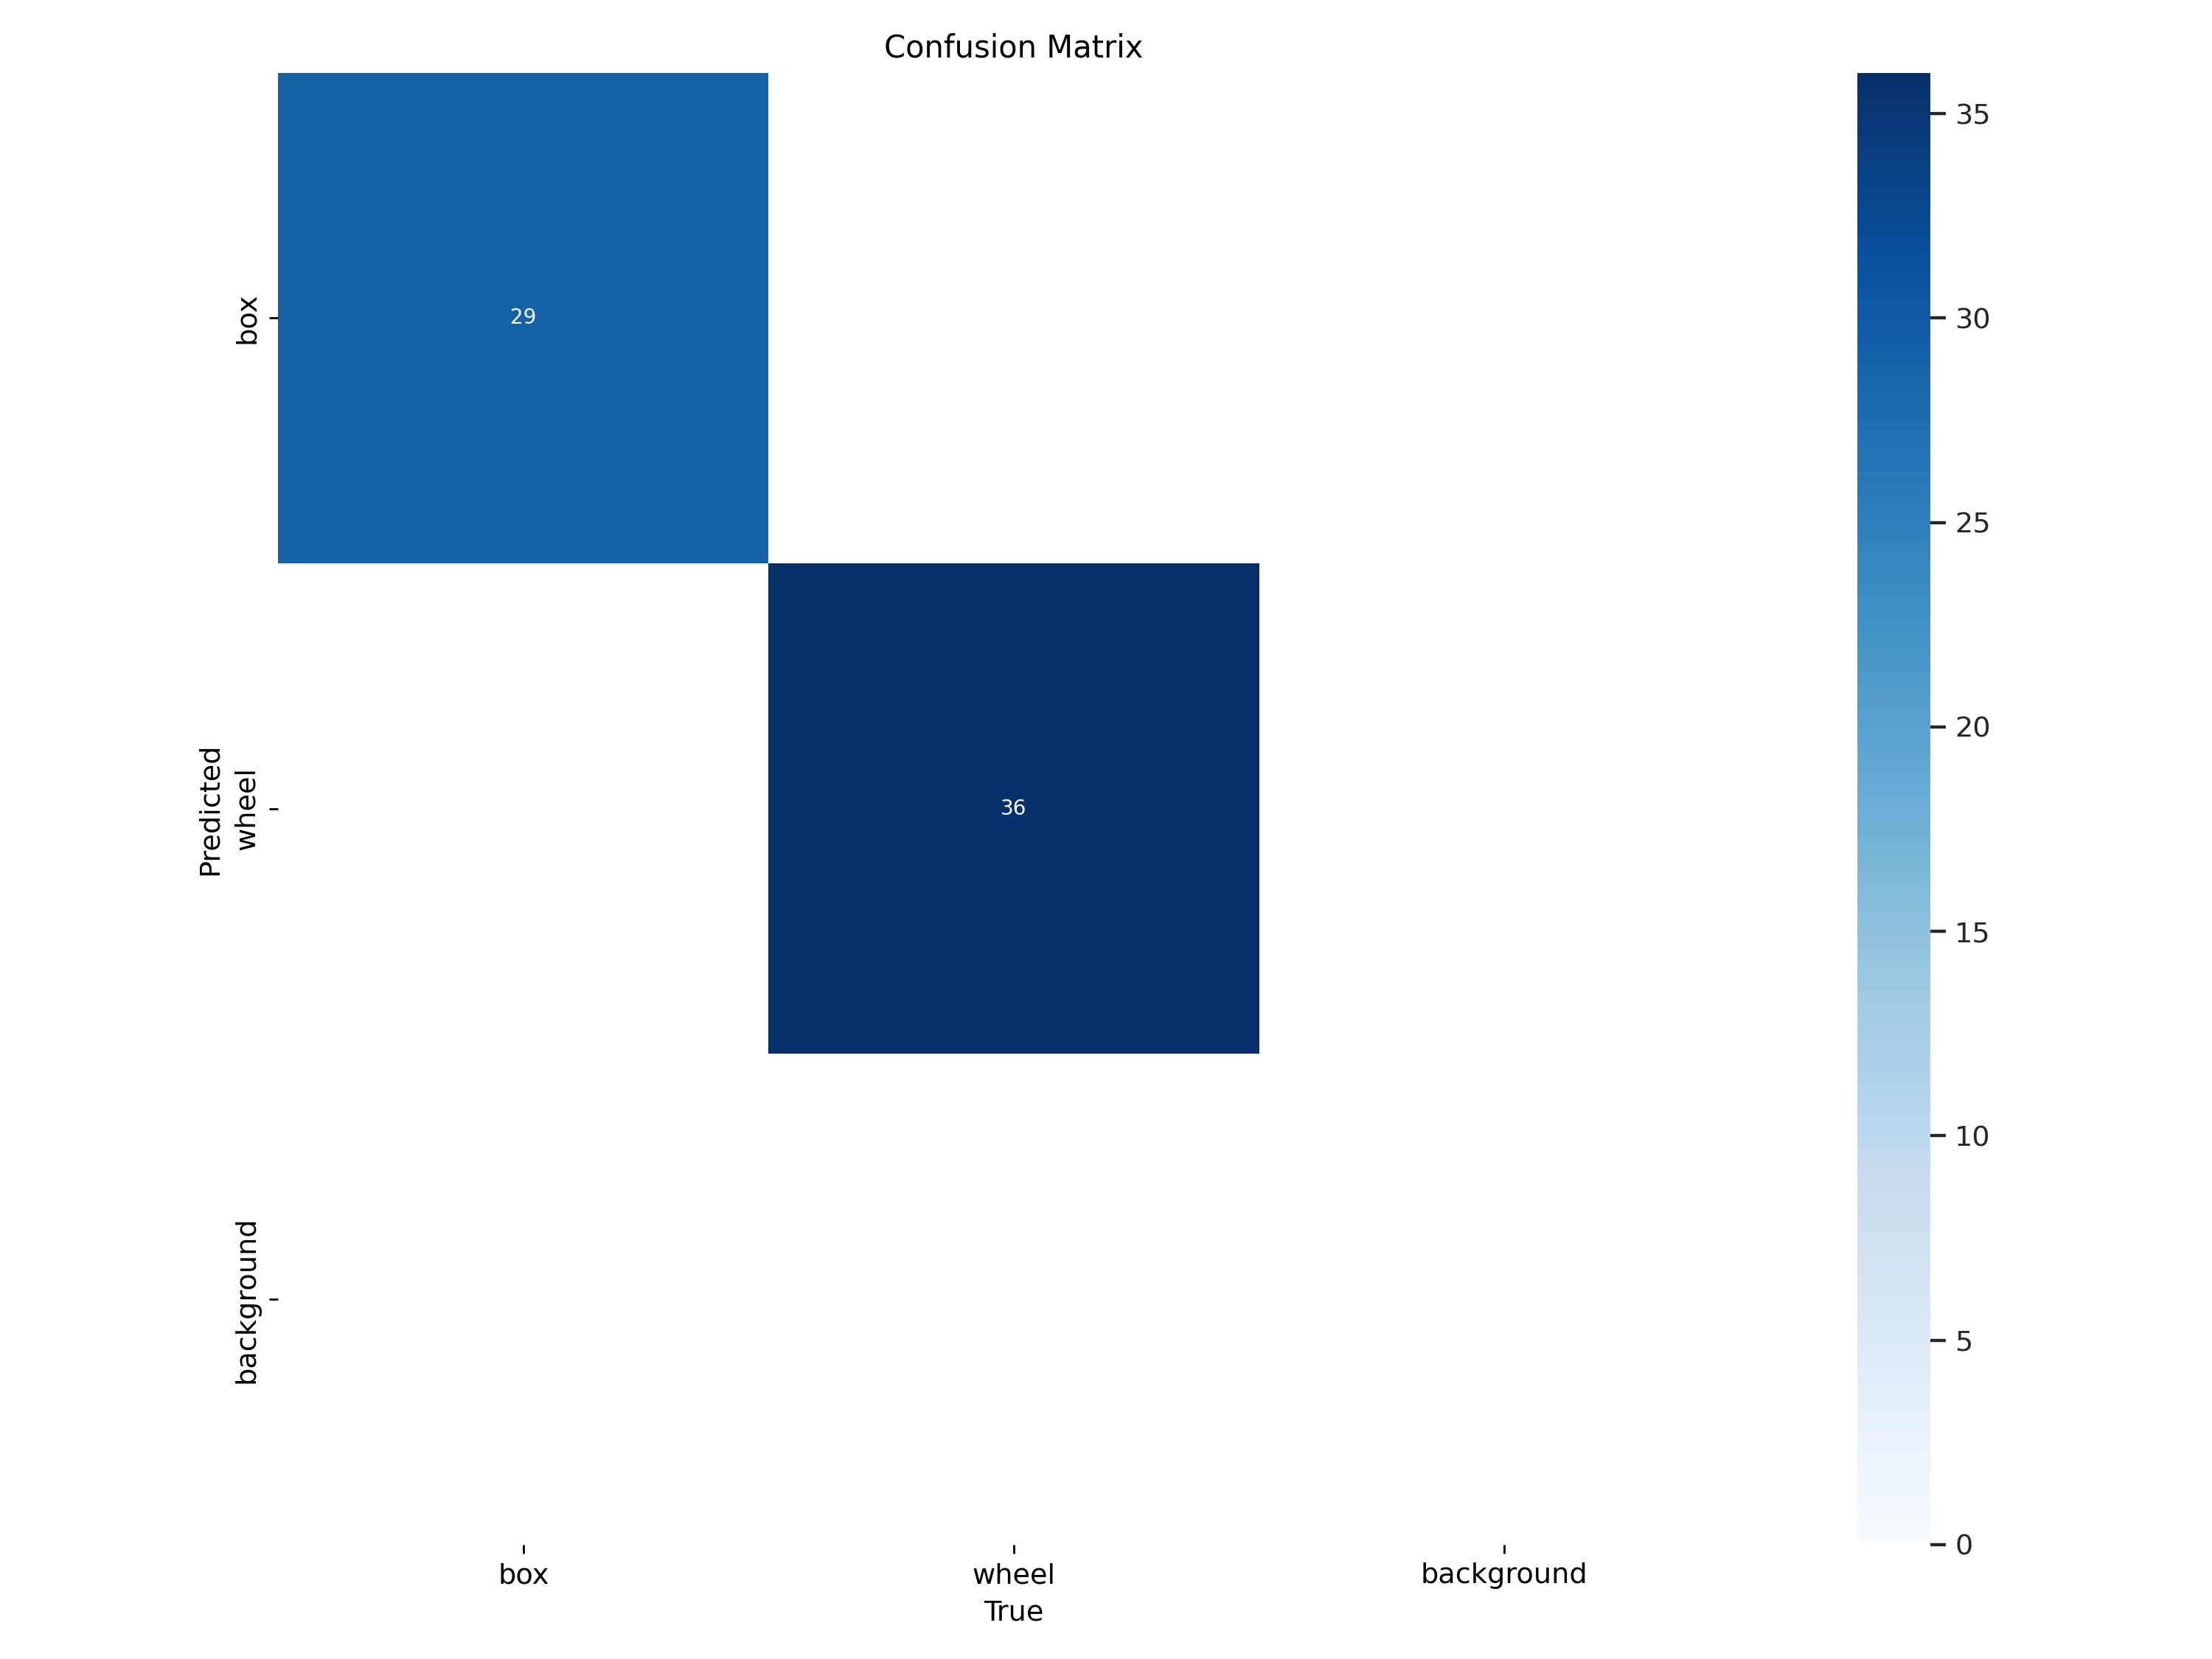

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


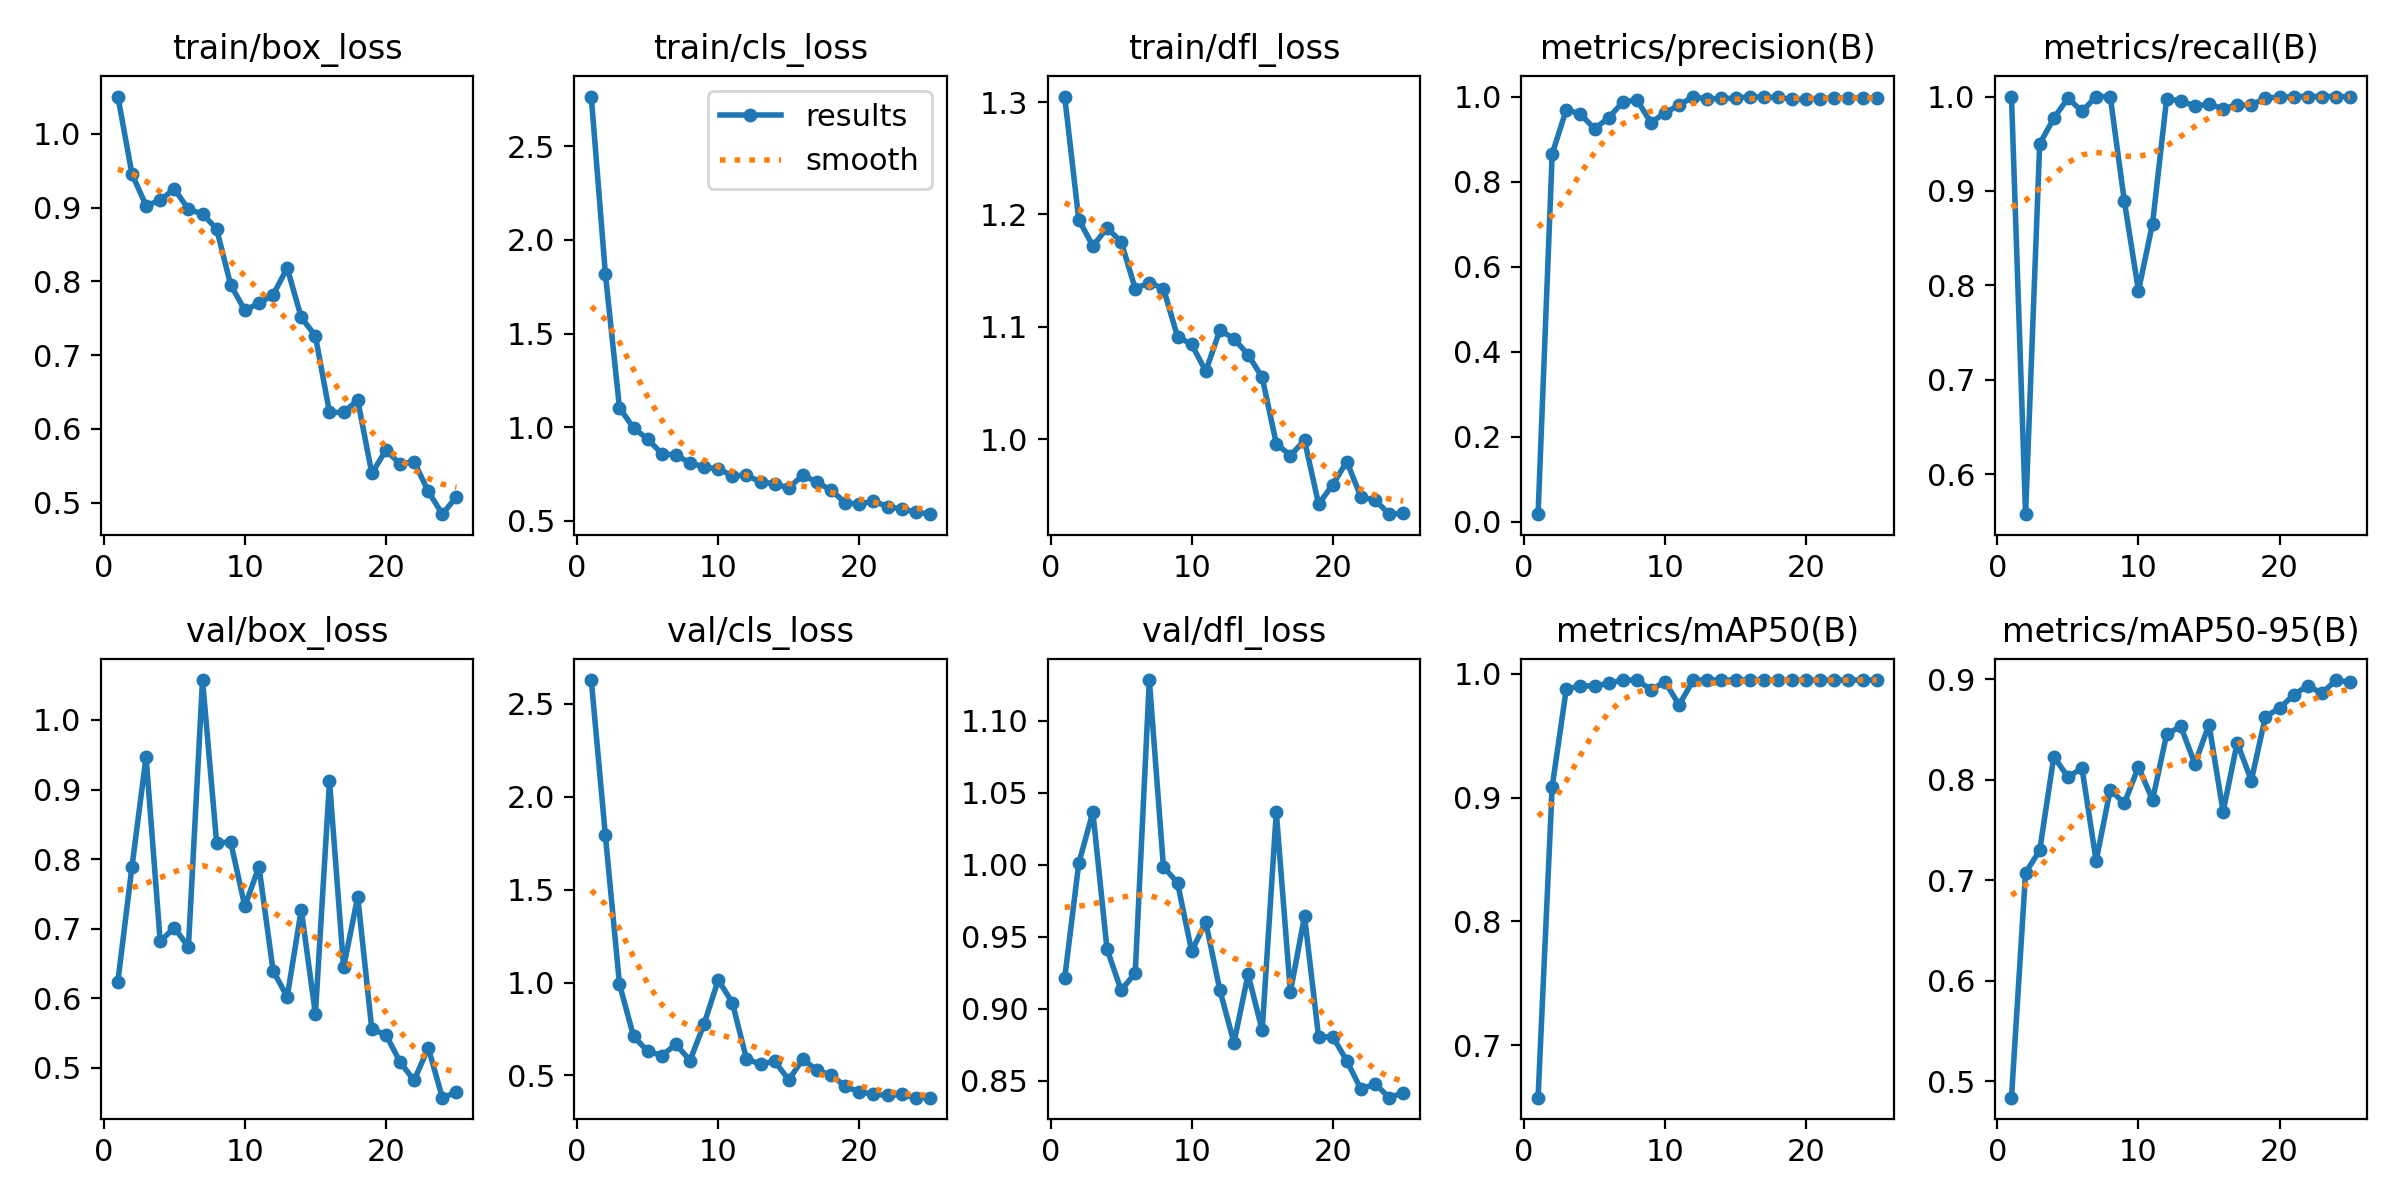

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


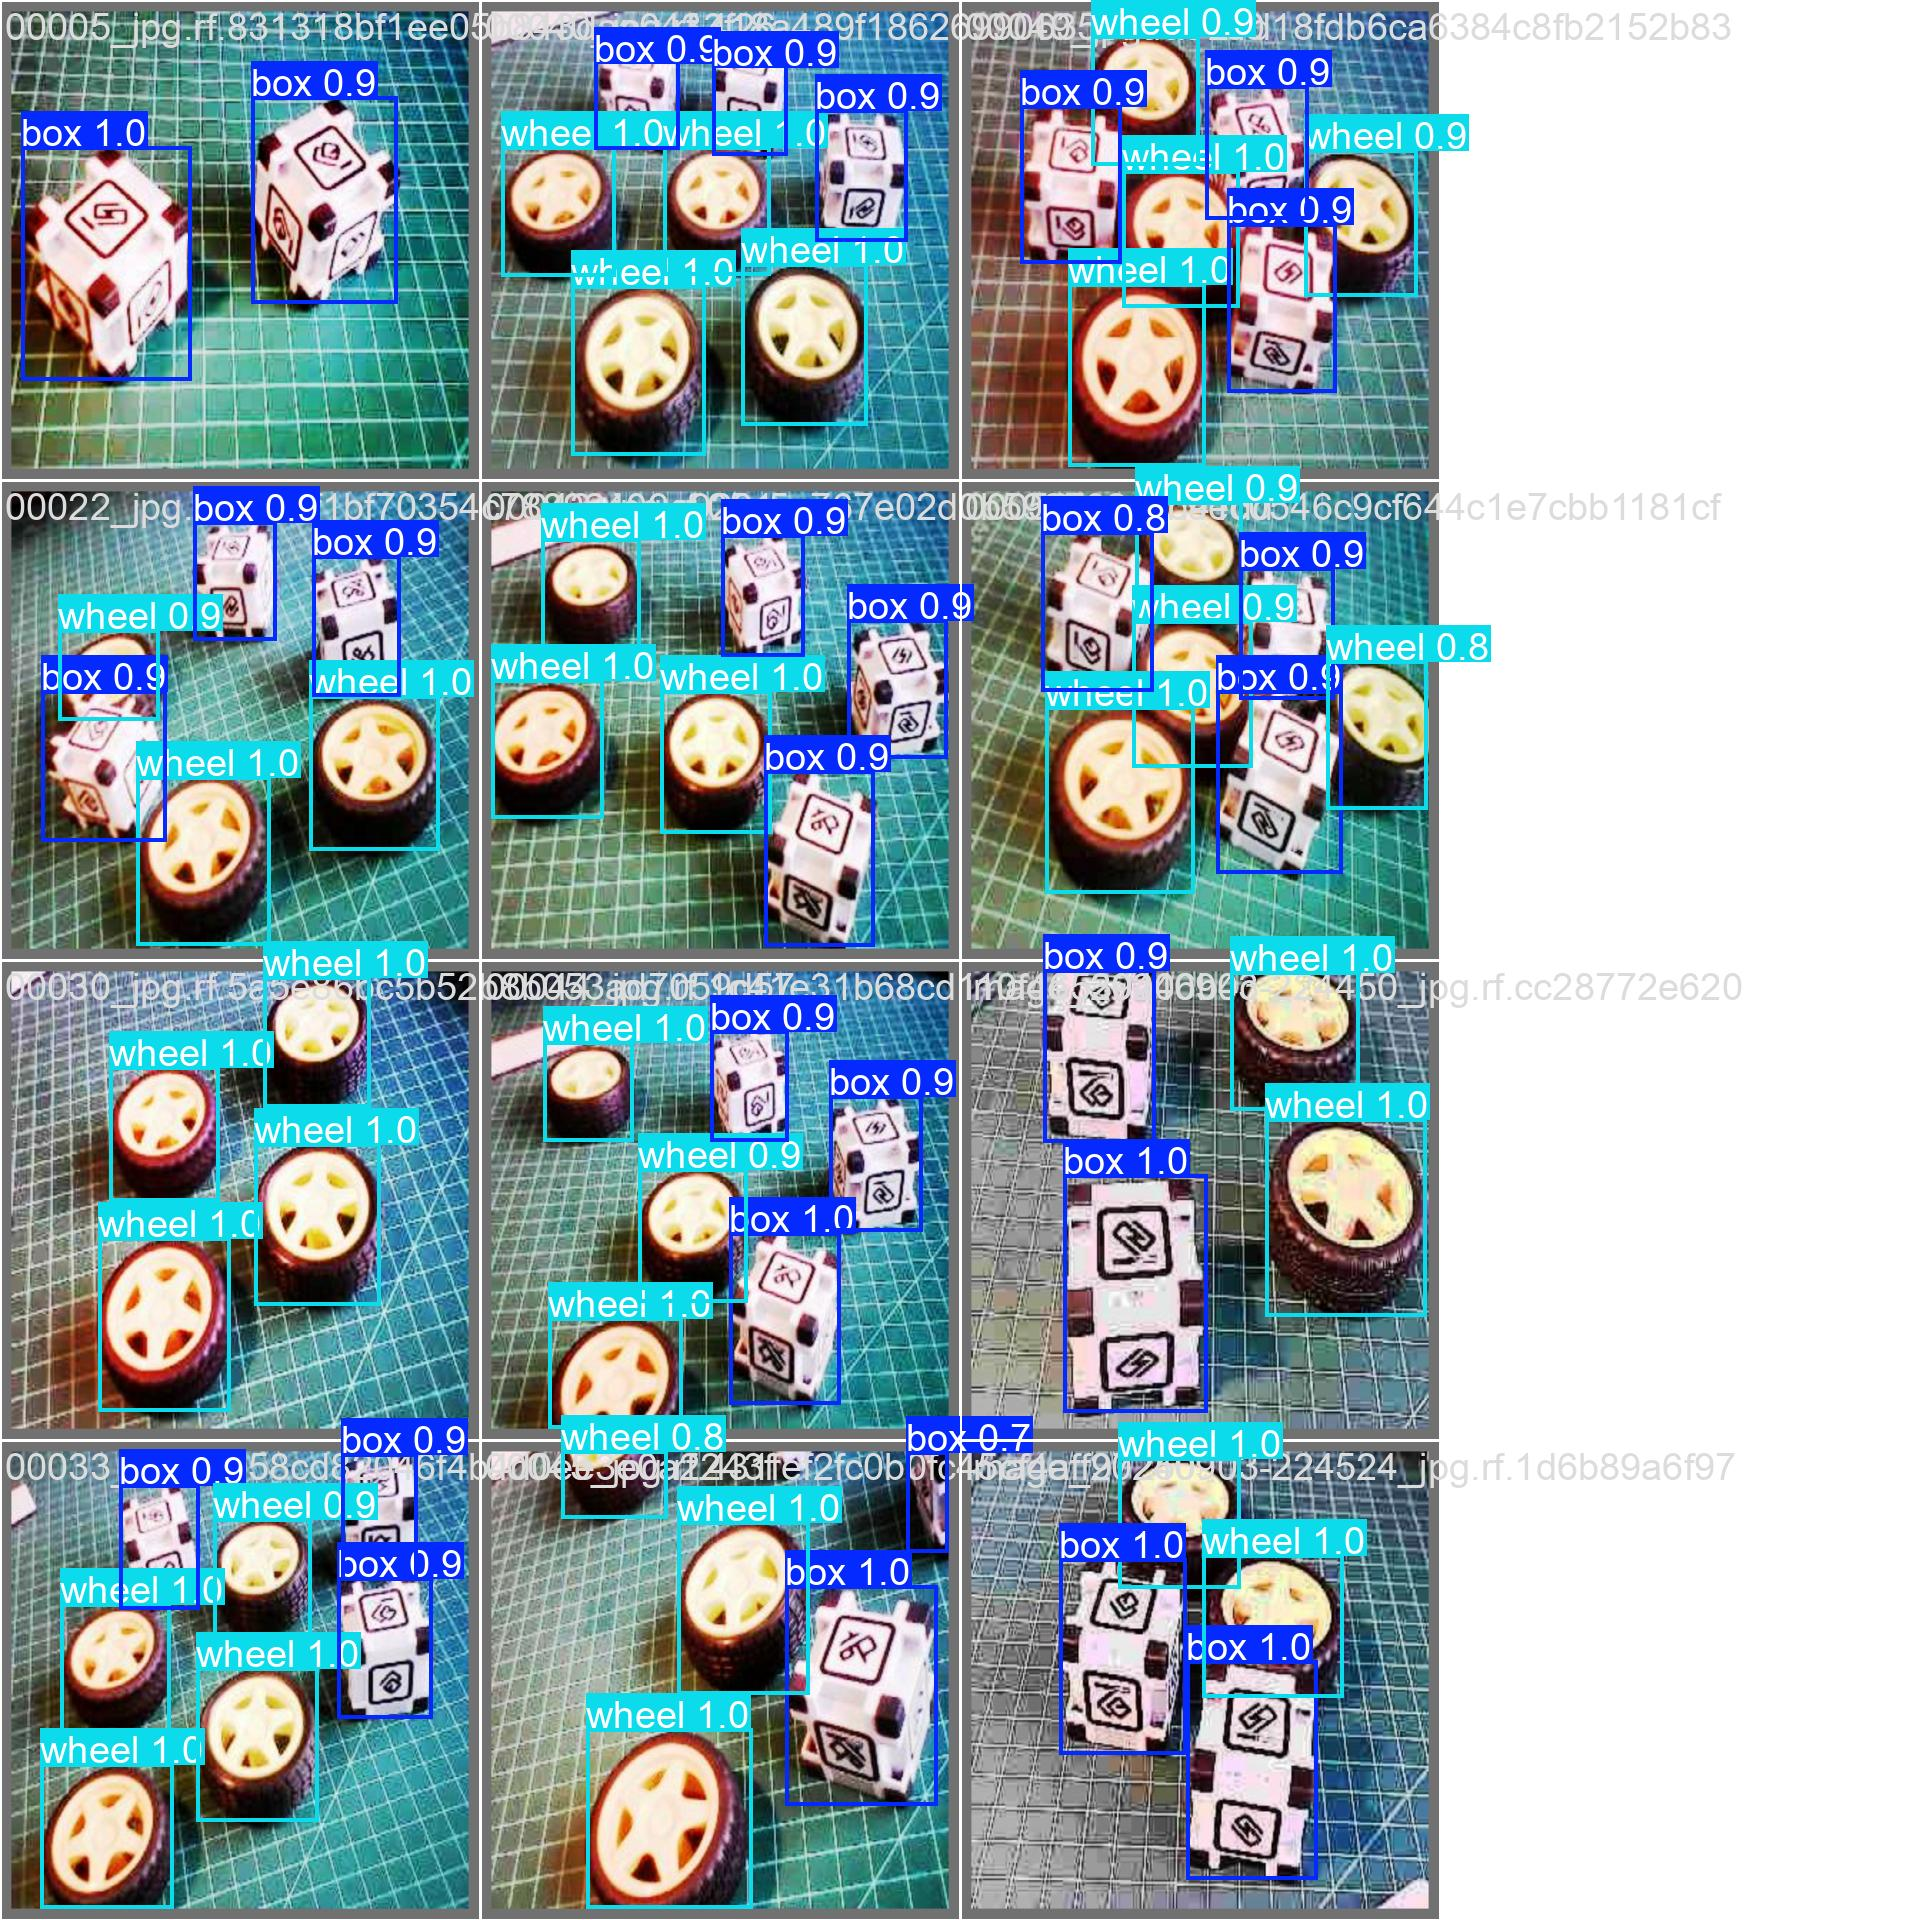

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [12]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.91 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/datasets/Box-versus-Wheel-auto-dataset-5/valid/labels.cache... 12 images, 0 backgrounds, 0 corrupt: 100% 12/12 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:01<00:00,  1.42s/it]
                   all         12         65      0.997          1      0.995      0.898
                   box         11         29      0.999          1      0.995      0.903
                 wheel         11         36      0.995          1      0.995      0.892
Speed: 0.7ms preprocess, 14.4ms inference, 0.0ms loss, 81.8ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with Custom Model

In [13]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.2.91 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs

image 1/6 /content/datasets/Box-versus-Wheel-auto-dataset-5/test/images/00000_jpg.rf.c19033fd9c1732b77189f50bd3f659f8.jpg: 640x640 1 box, 9.3ms
image 2/6 /content/datasets/Box-versus-Wheel-auto-dataset-5/test/images/00012_jpg.rf.860d2f3f1aff22ad6b9e355cdd82d9f7.jpg: 640x640 3 boxs, 1 wheel, 7.4ms
image 3/6 /content/datasets/Box-versus-Wheel-auto-dataset-5/test/images/00017_jpg.rf.44940bdfeb3c70cc8b590af7ae9c44d7.jpg: 640x640 1 box, 3 wheels, 7.3ms
image 4/6 /content/datasets/Box-versus-Wheel-auto-dataset-5/test/images/00018_jpg.rf.8af7a434da9d67b74a1280390ec0f41e.jpg: 640x640 1 box, 4 wheels, 7.3ms
image 5/6 /content/datasets/Box-versus-Wheel-auto-dataset-5/test/images/00046_jpg.rf.4807835cbda91563a6b240d8527f5cbe.jpg: 640x640 3 boxs, 4 wheels, 7.3ms
image 6/6 /content/datasets/Box-versus-Wheel-auto-dataset-5/t

**NOTE:** Let's take a look at few results.

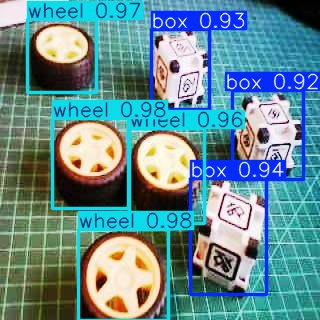

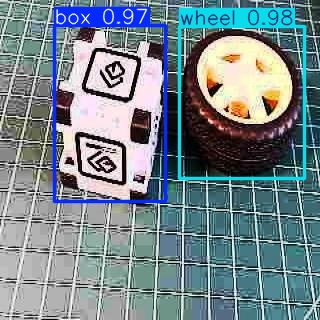

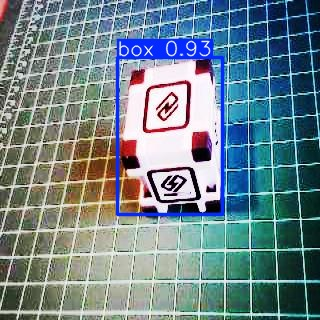

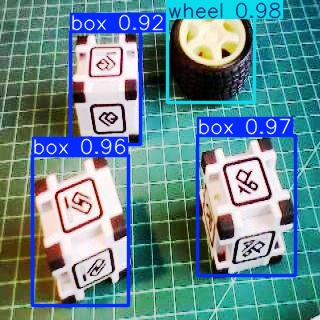

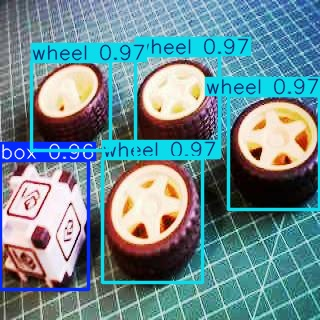

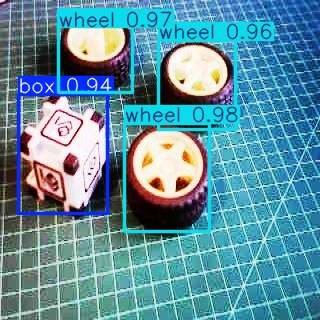

In [14]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:10]:
      display(Image(filename=image_path, width=600))
      print("\n")

## Export the Training Result to the Gdrive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [16]:
!scp -r /content/runs '/content/gdrive/MyDrive/10_UNIFEI/Box_vs_Wheel_Project'